In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import json

In [4]:
%matplotlib inline

In [5]:
with open("all_data_final_Derbyshire.json", "r") as f:
    data = json.loads(f.read())

In [6]:
data[0]

{'county': 'Derbyshire',
 'code': 'E00098112',
 'lad': 'Amber Valley',
 'rgn_main': 'East Midlands',
 'population': 250,
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '53.0955954',
   'lon': '-1.3784729',
   'other_tags': {'amenity': 'post_box'}},
  {'name': 'Wesley Methodist Church',
   'amenity': 'place_of_worship',
   'data_type': 'way',
   'lat': '53.0964645',
   'lon': '-1.3803576',
   'other_tags': {'addr:city': 'Alfreton',
    'addr:postcode': 'DE55 7HW',
    'addr:street': 'Ellesmere Avenue',
    'amenity': 'place_of_worship',
    'building': 'yes',
    'denomination': 'methodist',
    'ele': '133',
    'name': 'Wesley Methodist Church',
    'old_fhrs:id': '983997',
    'religion': 'christian',
    'website': 'https://alfretonwesley.co.uk/'}},
  {'name': 'Breath of Life Clinic',
   'amenity': 'healthcare',
   'data_type': 'way',
   'lat': '53.0956675',
   'lon': '-1.3783229',
   'other_tags': {'amenity': 'healthcare',
    'building':

In [7]:
lookup_df = pd.read_csv('oa_to_parishes.csv')
lookup_df.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_94627/1713820288.py:1: DtypeWarning: Columns (4,7,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  lookup_df = pd.read_csv('oa_to_parishes.csv')


ObjectId     OA21CD    PAR22CD        PAR22NM PAR22NMW   LTLA22CD  \
0         1  E00060311  E04000255  Dalton Piercy      NaN  E06000001   
1         2  E00060356  E04000257       Greatham      NaN  E06000001   
2         3  E00060360  E04000257       Greatham      NaN  E06000001   
3         4  E00060357  E04000257       Greatham      NaN  E06000001   
4         5  E00060359  E04000257       Greatham      NaN  E06000001   

     LTLA22NM LTLA22NMW   UTLA22CD    UTLA22NM UTLA22NMW    RGN22CD  \
0  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
1  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
2  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
3  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
4  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   

      RGN22NM RGN22NMW   CTRY22CD CTRY22NM CTRY22NMW    NAT22CD  \
0  North East      NaN  E92000001  England    Lloegr  K04000001   
1  North East      NaN  E92000001  England    Lloegr  K04000001   
2  North East      NaN  E92000001  England    Lloegr  K04000001   
3  North East      NaN  E92000001  England    Lloegr  K04000001   
4  North East      NaN  E92000001  England    Lloegr  K04000001   

             NAT22NM        NAT22NMW  
0  England and Wales  Cymru a Lloegr  
1  England and Wales  Cymru a Lloegr  
2  England and Wales  Cymru a Lloegr  
3  England and Wales  Cymru a Lloegr  
4  England and Wales  Cymru a Lloegr

In [8]:
parish_data = {}
for entry in data:
    parish_name = lookup_df[lookup_df.OA21CD == entry['code']].PAR22NM.values[0]
    try:
        parish_data[parish_name]['population'] += entry['population']
        for am in entry['amenities']:
            parish_data[parish_name]['amenities'].append(am)
    except:
        parish_data[parish_name] = {
            'population': entry['population'],
            'amenities': [am for am in entry['amenities']]
        }

In [14]:
for key, val in sorted(parish_data.items(), key=lambda x: x[1]['population'], reverse=False):
    print("{0} - population {1} - {2} pubs".format(
        key, 
        val['population'],
        len([t for t in val['amenities'] if t['amenity'] == 'pub']
    )))

Ashleyhay - population 105 - 0 pubs
Harthill - population 108 - 0 pubs
Bradbourne - population 110 - 0 pubs
Wardlow - population 113 - 1 pubs
Lullington - population 124 - 1 pubs
Eaton and Alsop - population 129 - 0 pubs
Brough and Shatton - population 129 - 0 pubs
King Sterndale - population 130 - 0 pubs
Mapleton - population 132 - 1 pubs
Middleton and Smerrill - population 133 - 0 pubs
Tissington and Lea Hall - population 134 - 0 pubs
Sutton on the Hill - population 134 - 0 pubs
Edensor - population 138 - 0 pubs
Thorpe - population 139 - 1 pubs
Thornhill - population 146 - 0 pubs
Aston - population 154 - 2 pubs
Windley - population 155 - 1 pubs
Aldwark - population 157 - 0 pubs
Beeley - population 157 - 1 pubs
Osmaston - population 163 - 1 pubs
Twyford and Stenson - population 165 - 1 pubs
Biggin - population 166 - 0 pubs
Fenny Bentley - population 184 - 3 pubs
Froggatt - population 185 - 0 pubs
Hulland - population 187 - 0 pubs
Flagg - population 198 - 0 pubs
Snelston - population 2

In [17]:
import os
import glob

In [18]:
!ls

Cambridgeshire_county_data.json
Cumbria_county_data.json
DataAnalysis.ipynb
Derbyshire_county_data.json
Devon_county_data.json
East Sussex_county_data.json
Essex_county_data.json
Gloucestershire_county_data.json
Greater Manchester_county_data.json
Hampshire_county_data.json
Hertfordshire_county_data.json
Kent_county_data.json
Lancashire_county_data.json
Leicestershire_county_data.json
Lincolnshire_county_data.json
Local_Authority_District_to_County_(April_2021)_Lookup_in_England.csv
Local_Authority_District_to_Region_(April_2021)_Lookup_in_England.csv
Merseyside_county_data.json
Norfolk_county_data.json
North Yorkshire_county_data.json
Nottinghamshire_county_data.json
OA_2021_EW_BFE_V7.cpg
OA_2021_EW_BFE_V7.dbf
OA_2021_EW_BFE_V7.prj
OA_2021_EW_BFE_V7.shp
OA_2021_EW_BFE_V7.shx
Output_Areas_(2011)_to_Output_Areas_(2021)_to_Local_Authority_District_(2022)_Lookup_in_England_and_Wales_(Version_2).csv
Output_Areas_(December_2021)_Boundaries_EW_BFE.xml
Oxfordshire_county_data.json
RUC11_OA11_

In [21]:
def fn_to_county(name):
    return name.split('_')[-1].split('.')[0]


def group_by_parish(data):
    parish_data = {}
    for entry in data:
        parish_name = lookup_df[lookup_df.OA21CD == entry['code']].PAR22NM.values[0]
        try:
            parish_data[parish_name]['population'] += entry['population']
            for am in entry['amenities']:
                parish_data[parish_name]['amenities'].append(am)
        except:
            parish_data[parish_name] = {
                'population': entry['population'],
                'amenities': [am for am in entry['amenities']]
            }
    return parish_data
    

overall_dict = {}
for result in glob.iglob('all_data_final_*.json'):
    name = fn_to_county(result)
    with open(result, 'r') as f:
        data = json.loads(f.read())
    by_parish = group_by_parish(data)
    print("Finished for {0}".format(name))
    overall_dict[result] = by_parish
    

Finished for North Yorkshire
Finished for Warwickshire
Finished for Surrey
Finished for Lancashire
Finished for Leicestershire
Finished for Merseyside
Finished for West Yorkshire
Finished for Somerset
Finished for Worcestershire
Finished for Essex
Finished for Norfolk
Finished for Hampshire
Finished for East Sussex
Finished for Nottinghamshire
Finished for Suffolk
Finished for West Midlands
Finished for South Yorkshire
Finished for Lincolnshire
Finished for Kent
Finished for Cumbria
Finished for West Sussex
Finished for Cambridgeshire
Finished for Staffordshire
Finished for Devon
Finished for Derbyshire
Finished for Hertfordshire
Finished for Gloucestershire
Finished for Tyne and Wear
Finished for Oxfordshire


In [24]:
better_dict = dict((fn_to_county(i), j) for i, j in overall_dict.items())

In [26]:
better_dict.keys()

dict_keys(['North Yorkshire', 'Warwickshire', 'Surrey', 'Lancashire', 'Leicestershire', 'Merseyside', 'West Yorkshire', 'Somerset', 'Worcestershire', 'Essex', 'Norfolk', 'Hampshire', 'East Sussex', 'Nottinghamshire', 'Suffolk', 'West Midlands', 'South Yorkshire', 'Lincolnshire', 'Kent', 'Cumbria', 'West Sussex', 'Cambridgeshire', 'Staffordshire', 'Devon', 'Derbyshire', 'Hertfordshire', 'Gloucestershire', 'Tyne and Wear', 'Oxfordshire'])

In [27]:
better_dict['North Yorkshire']

{'Bradleys Both': {'population': 1203,
  'amenities': [{'name': 'Methodist Church',
    'amenity': 'place_of_worship',
    'data_type': 'way',
    'lat': '53.9325089',
    'lon': '-1.9962614',
    'other_tags': {'amenity': 'place_of_worship',
     'denomination': 'methodist',
     'name': 'Methodist Church',
     'religion': 'christian'}},
   {'name': "St Mary's",
    'amenity': 'place_of_worship',
    'data_type': 'way',
    'lat': '53.9311679',
    'lon': '-1.9935821',
    'other_tags': {'amenity': 'place_of_worship',
     'denomination': 'anglican',
     'name': "St Mary's",
     'religion': 'christian',
     'wikidata': 'Q105084357'}},
   {'name': 'The Slaters Arms',
    'amenity': 'pub',
    'data_type': 'way',
    'lat': '53.9299068',
    'lon': '-1.9957173',
    'other_tags': {'addr:city': 'Keighley',
     'addr:county': 'North Yorkshire',
     'addr:postcode': 'BD20 9DE',
     'addr:street': 'Crag Lane',
     'addr:village': 'Low Bradley',
     'amenity': 'pub',
     'building'

In [31]:
unpacked = []
for county, data in better_dict.items():
    for parish, other in data.items():
        for am in other['amenities']:
            unpacked.append(am['amenity'])

In [32]:
len(unpacked)

457648

In [35]:
from collections import Counter
Counter(unpacked).most_common(30)

[('parking', 101025),
 ('bench', 45497),
 ('post_box', 42489),
 ('parking_space', 29290),
 ('waste_basket', 22739),
 ('pub', 20247),
 ('place_of_worship', 19062),
 ('fast_food', 16573),
 ('school', 14164),
 ('cafe', 13860),
 ('bicycle_parking', 13253),
 ('restaurant', 12033),
 ('telephone', 8420),
 ('grave_yard', 7692),
 ('grit_bin', 6194),
 ('toilets', 5148),
 ('community_centre', 5066),
 ('post_office', 4537),
 ('atm', 4432),
 ('recycling', 4225),
 ('pharmacy', 4028),
 ('fuel', 3943),
 ('social_facility', 3560),
 ('shelter', 3217),
 ('bank', 2854),
 ('hunting_stand', 2782),
 ('doctors', 2594),
 ('bar', 2270),
 ('vending_machine', 2048),
 ('dentist', 1967)]

In [36]:
to_get = ['pub', 'place_of_worship', 'school', 'cafe', 'community_centre', 'doctors']

In [40]:
big_list = []
for county, data in better_dict.items():
    for parish, other in data.items():
        population = other['population']
        parish_thing = dict((i, 0) for i in to_get)
        parish_thing['population'] = population
        parish_thing['name'] = parish
        parish_thing['county'] = county
        for am in other['amenities']:
            am_type = am['amenity']
            if am_type in to_get:
                parish_thing[am_type] += 1
        big_list.append(parish_thing)

In [41]:
big_list[0]

{'pub': 2,
 'place_of_worship': 2,
 'school': 1,
 'cafe': 0,
 'community_centre': 0,
 'doctors': 0,
 'population': 1203,
 'name': 'Bradleys Both',
 'county': 'North Yorkshire'}

In [42]:
df = pd.DataFrame(big_list)

In [43]:
df.head()

pub  place_of_worship  school  cafe  community_centre  doctors  population  \
0    2                 2       1     0                 0        0        1203   
1    2                 1       1     0                 1        0        1469   
2    0                 1       0     0                 0        0         481   
3    1                 2       1     0                 0        0         222   
4    1                 2       1     0                 1        0         509   

            name           county  
0  Bradleys Both  North Yorkshire  
1       Cononley  North Yorkshire  
2       Farnhill  North Yorkshire  
3       Kildwick  North Yorkshire  
4    Lothersdale  North Yorkshire

In [44]:
df.shape

(6613, 9)

In [46]:
df.sort_values(by='population', ascending=False).head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
3615  340               540     441   345                44      140   
1282  405               257     234   571               112       70   
3731  286               226     170   312                61       70   
1226  287               230     188   158                21       24   
3623  175               164     125    69                17       30   

      population                         name           county  
3615     1040773  Birmingham, unparished area    West Midlands  
1282      639331       Leeds, unparished area   West Yorkshire  
3731      494678   Sheffield, unparished area  South Yorkshire  
1226      486093   Liverpool, unparished area       Merseyside  
3623      341843    Sandwell, unparished area    West Midlands

In [51]:
parished_only = df[df.name.apply(lambda x: 'unparished' not in x)].sort_values(by='population', ascending=False)
parished_only.head(10)

pub  place_of_worship  school  cafe  community_centre  doctors  \
3617   39                40      39    36                 6        2   
1820   32                23      19    16                 1        4   
1263   36                29      23     6                 5        5   
6333   29                22      22    24                 7        4   
682    37                24      18    47                 6        7   
2784   20                13      25    14                 0        3   
3568   29                20      20    22                 3        1   
4364   30                22      19    36                 2        4   
2920   12                25      14    52                10        7   
6056   18                17      14    25                10        5   

      population                  name          county  
3617       96702      Sutton Coldfield   West Midlands  
1820       57414         Kidderminster  Worcestershire  
1263       57354              Keighley  West Yorkshire  
6333       54331               Banbury     Oxfordshire  
682        50923  Royal Leamington Spa    Warwickshire  
2784       50813               Andover       Hampshire  
3568       47872             Lowestoft         Suffolk  
4364       47347            Folkestone            Kent  
2920       44568        Bexhill-on-Sea     East Sussex  
6056       42874              Hatfield   Hertfordshire

In [52]:
parished_only.tail(10)

pub  place_of_worship  school  cafe  community_centre  doctors  \
4084    0                 1       0     0                 0        0   
4112    0                 0       0     0                 0        0   
3784    0                 0       0     0                 0        0   
3821    1                 2       0     0                 0        0   
5032    0                 1       0     0                 0        0   
3534    0                 1       0     0                 0        0   
1634    1                 1       0     0                 0        0   
235     1                 0       0     1                 0        0   
1648    0                 1       0     0                 0        0   
3410    0                 1       0     0                 0        0   

      population               name           county  
4084         104            Heapham     Lincolnshire  
4112         104         Broadholme     Lincolnshire  
3784         103           West Fen     Lincolnshire  
3821         103            Hainton     Lincolnshire  
5032         103  Shingay cum Wendy   Cambridgeshire  
3534         103         Sternfield          Suffolk  
1634         102         Monksilver         Somerset  
235          102           Plompton  North Yorkshire  
1648         101   East Quantoxhead         Somerset  
3410         100            Denston          Suffolk

In [89]:
parished_only.loc[:, 'population_grouped'] = parished_only.population.apply(
lambda x: 100*np.round(x/100) if x < 2000 else 500*np.round(x/500) if x < 5000 else np.round(x/5000)*5000)


In [90]:
parished_only.groupby(['population_grouped']).agg('mean')[to_get]

pub  place_of_worship     school       cafe  \
population_grouped                                                      
100.0                0.272727          1.006494   0.064935   0.188312   
200.0                0.473441          1.138568   0.103926   0.239030   
300.0                0.665730          1.272472   0.207865   0.275281   
400.0                0.859023          1.343985   0.368421   0.321429   
500.0                1.024450          1.374083   0.459658   0.315403   
600.0                1.075710          1.413249   0.555205   0.331230   
700.0                1.236735          1.322449   0.755102   0.489796   
800.0                1.364407          1.406780   0.877119   0.533898   
900.0                1.243386          1.428571   0.915344   0.550265   
1000.0               1.429412          1.623529   0.947059   0.547059   
1100.0               1.686441          1.550847   0.940678   0.686441   
1200.0               1.742857          1.514286   1.050000   0.500000   
1300.0               1.857143          1.659341   1.054945   0.670330   
1400.0               1.877551          1.775510   1.183673   0.887755   
1500.0               1.947368          1.810526   1.210526   0.684211   
1600.0               1.950617          1.814815   1.098765   0.604938   
1700.0               1.761194          1.611940   1.149254   0.731343   
1800.0               2.028169          1.816901   1.267606   0.985915   
1900.0               2.281250          1.984375   1.250000   1.546875   
2000.0               1.970930          1.744186   1.337209   0.953488   
2500.0               2.152466          2.026906   1.390135   0.869955   
3000.0               2.365169          2.325843   1.640449   1.292135   
3500.0               2.663793          2.344828   1.784483   1.310345   
4000.0               2.818182          2.329545   1.863636   1.693182   
4500.0               3.339450          2.541284   1.935780   2.706422   
5000.0               3.857143          2.954545   2.558442   2.363636   
10000.0              5.574899          4.210526   4.137652   3.898785   
15000.0              9.235294          6.421569   6.196078   7.372549   
20000.0             11.166667          8.759259   8.907407   9.296296   
25000.0             14.161290         10.774194  10.903226  11.258065   
30000.0             17.086957         12.521739  12.304348  16.652174   
35000.0             20.777778         13.000000  13.666667  17.777778   
40000.0             22.142857         15.857143  18.428571  17.428571   
45000.0             20.000000         21.333333  15.666667  37.666667   
50000.0             28.666667         19.000000  21.000000  27.666667   
55000.0             32.333333         24.666667  21.333333  15.333333   
95000.0             39.000000         40.000000  39.000000  36.000000   

                    community_centre   doctors  
population_grouped                              
100.0                       0.142857  0.000000  
200.0                       0.193995  0.002309  
300.0                       0.324438  0.002809  
400.0                       0.360902  0.001880  
500.0                       0.303178  0.017115  
600.0                       0.413249  0.015773  
700.0                       0.444898  0.044898  
800.0                       0.432203  0.067797  
900.0                       0.417989  0.052910  
1000.0                      0.505882  0.047059  
1100.0                      0.483051  0.101695  
1200.0                      0.528571  0.085714  
1300.0                      0.472527  0.109890  
1400.0                      0.489796  0.112245  
1500.0                      0.442105  0.115789  
1600.0                      0.555556  0.086420  
1700.0                      0.522388  0.164179  
1800.0                      0.521127  0.183099  
1900.0                      0.593750  0.171875  
2000.0                      0.546512  0.203488  
2500.0                      0.641256  0.246637  
3000.0                      0.707865  0.376404  
35

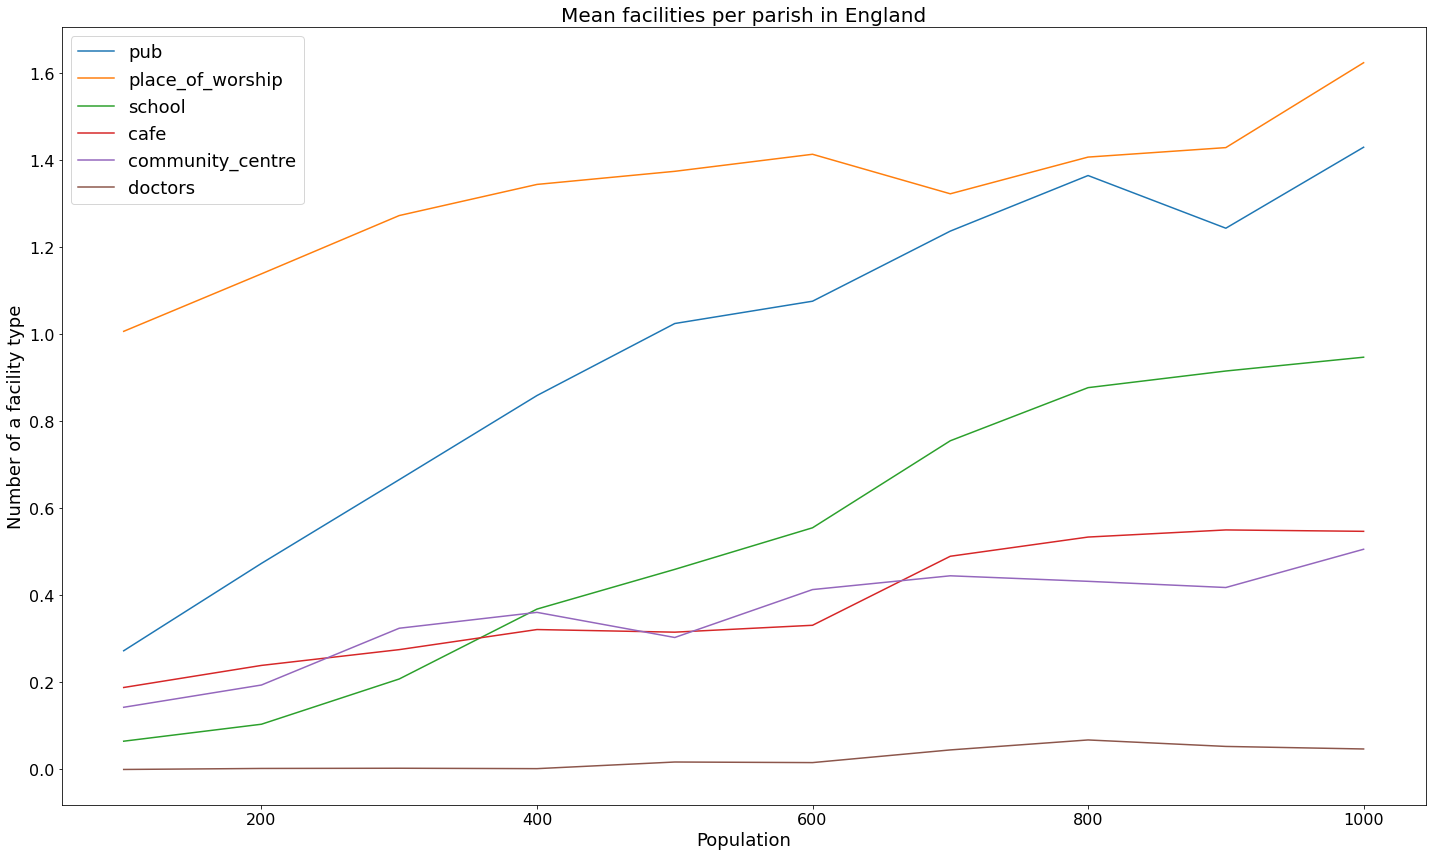

In [91]:
fig, ax = plt.subplots(figsize=(20,12))
parished_only[parished_only.population_grouped <= 1000].groupby(['population_grouped']).agg('mean')[to_get].plot(ax=ax)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Number of a facility type', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Mean facilities per parish in England', fontsize=20)
plt.tight_layout()
plt.savefig('avg_facilities_per_parish_small.png')
plt.show()

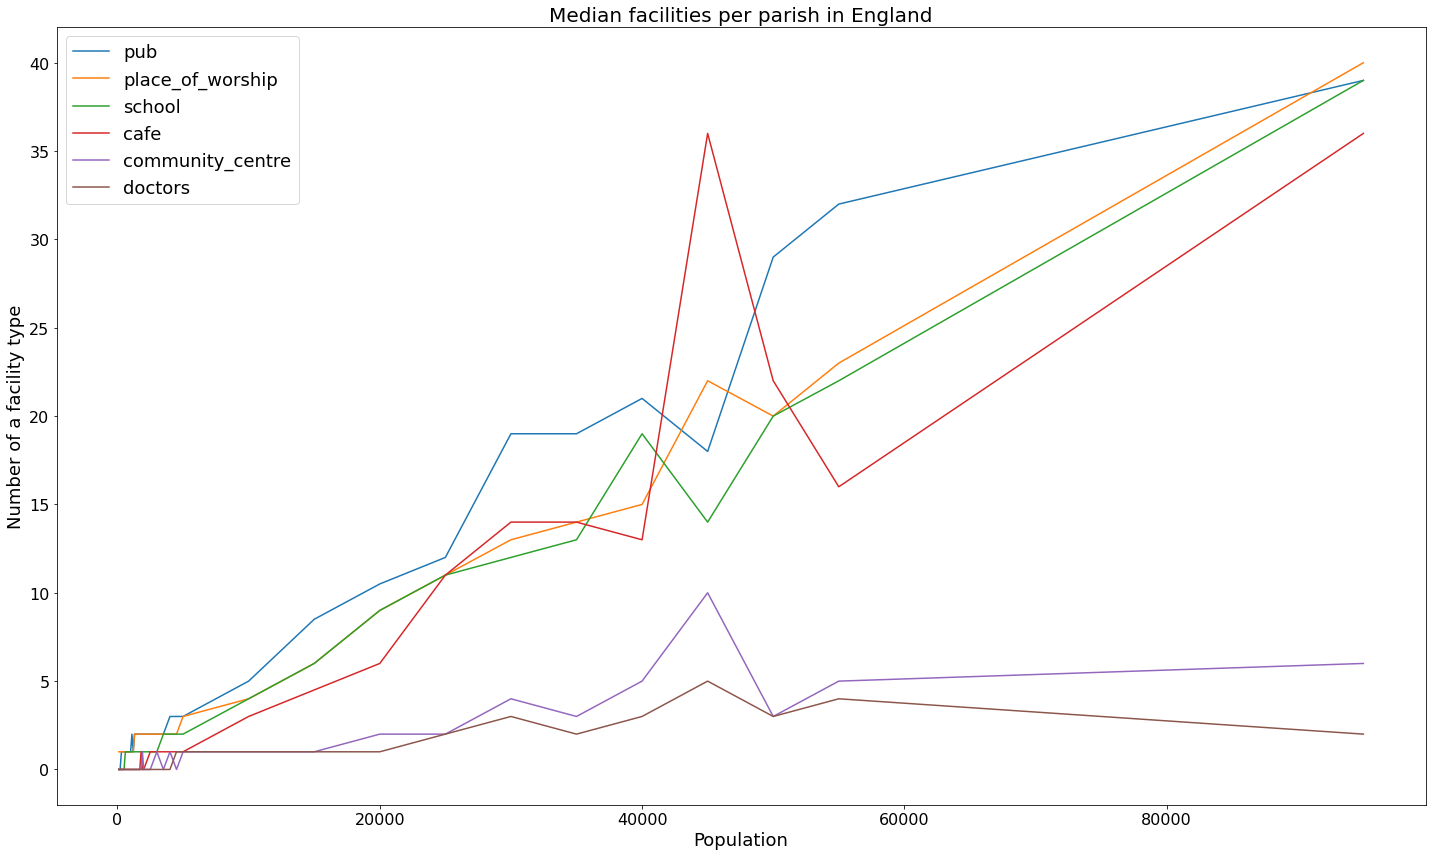

In [92]:
fig, ax = plt.subplots(figsize=(20,12))
parished_only.groupby(['population_grouped']).agg('median')[to_get].plot(ax=ax)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Number of a facility type', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Median facilities per parish in England', fontsize=20)
plt.tight_layout()
plt.savefig('median_facilities_per_parish.png')
plt.show()

In [63]:
parished_only.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
3617   39                40      39    36                 6        2   
1820   32                23      19    16                 1        4   
1263   36                29      23     6                 5        5   
6333   29                22      22    24                 7        4   
682    37                24      18    47                 6        7   

      population                  name          county  population_grouped  
3617       96702      Sutton Coldfield   West Midlands             95000.0  
1820       57414         Kidderminster  Worcestershire             55000.0  
1263       57354              Keighley  West Yorkshire             55000.0  
6333       54331               Banbury     Oxfordshire             55000.0  
682        50923  Royal Leamington Spa    Warwickshire             50000.0

In [65]:
np.var(parished_only.pub)

10.479198680162087

In [66]:
np.mean(parished_only.pub)

1.9367869256860932

In [67]:
np.var(parished_only)

/opt/homebrew/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3755: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


pub                   1.047920e+01
place_of_worship      4.707270e+00
school                4.709366e+00
cafe                  1.074144e+01
community_centre      9.510767e-01
doctors               3.396250e-01
population            2.322656e+07
population_grouped    2.290986e+07
dtype: float64

In [68]:
mu = np.mean(parished_only.pub)
sigma_sqr = np.var(parished_only.pub)

n = mu**2 / (sigma_sqr - mu)
p = mu / sigma_sqr

In [69]:
n = 

0.4391199702523225

In [70]:
p

0.18482204458558238

In [75]:
mu

1.9367869256860932

In [76]:
sigma_sqr

10.479198680162087

In [71]:
from scipy.stats import nbinom

In [78]:
n = parished_only.pub.values
p = parished_only.pub.values / parished_only.population.values

In [82]:
nbinom(parished_only.pub.values, parished_only.pub.values / parished_only.population.values).ppf()

TypeError: ppf() missing 1 required positional argument: 'q'

In [85]:
parished_only.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
3617   39                40      39    36                 6        2   
1820   32                23      19    16                 1        4   
1263   36                29      23     6                 5        5   
6333   29                22      22    24                 7        4   
682    37                24      18    47                 6        7   

      population                  name          county  population_grouped  
3617       96702      Sutton Coldfield   West Midlands             95000.0  
1820       57414         Kidderminster  Worcestershire             55000.0  
1263       57354              Keighley  West Yorkshire             55000.0  
6333       54331               Banbury     Oxfordshire             55000.0  
682        50923  Royal Leamington Spa    Warwickshire             50000.0

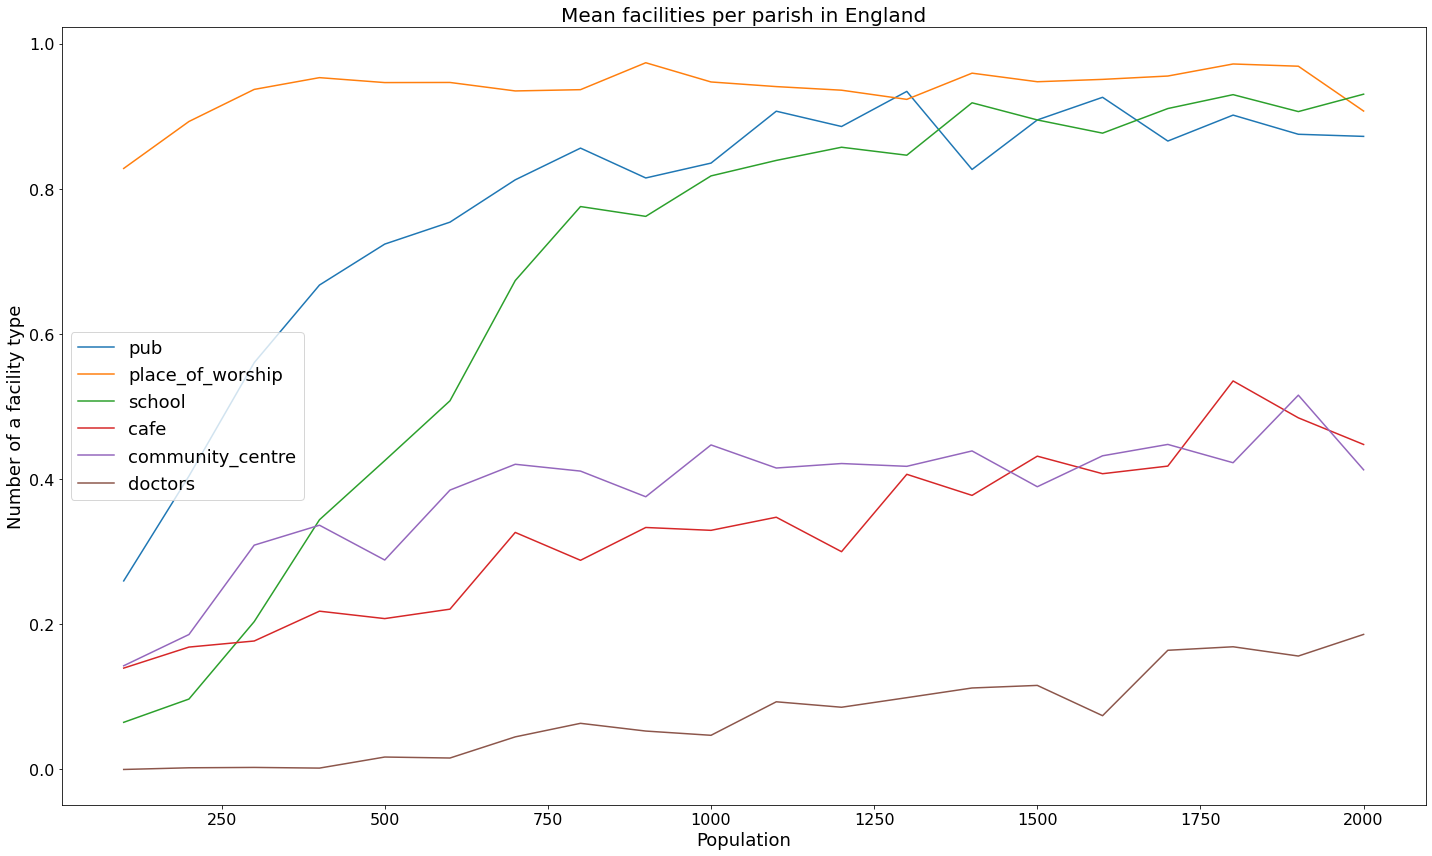

In [94]:
fig, ax = plt.subplots(figsize=(20,12))
small_parishes = parished_only[parished_only.population_grouped <= 2000]
for item in to_get:
    copy = small_parishes.copy()
    copy.loc[:, 'masked_item'] = copy[[item]] > 0
    copy.groupby(['population_grouped']).masked_item.agg('mean').plot(ax=ax, label=item)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Number of a facility type', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Mean facilities per parish in England', fontsize=20)
plt.tight_layout()
#plt.savefig('avg_facilities_per_parish_small.png')
plt.show()

In [95]:
d = np.random.poisson(9,100000)
d

array([11,  6,  9, ...,  8, 14,  7])

In [96]:
d[:10]

array([11,  6,  9,  7,  6, 10, 11,  8,  8,  7])

In [97]:
s = np.random.negative_binomial(3,0.25,100000)
s

array([ 9,  9,  7, ..., 16, 13, 18])

In [98]:
s[:10]

array([ 9,  9,  7,  1, 15,  9,  5,  5,  2,  3])

In [99]:
small_parishes.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
6210    3                 2       1     2                 0        1   
967     0                 0       2     1                 0        0   
817     2                 2       1     0                 0        0   
3753    3                 1       2     0                 1        0   
2069    3                 3       1     1                 1        0   

      population          name           county  population_grouped  
6210        2250      Berkeley  Gloucestershire              2000.0  
967         2248  Little Hoole       Lancashire              2000.0  
817         2240        Hapton       Lancashire              2000.0  
3753        2240     Old Leake     Lincolnshire              2000.0  
2069        2236        Weeley            Essex              2000.0

In [101]:
p

array([0.0004033 , 0.00055736, 0.00062768, ..., 0.00980392, 0.        ,
       0.        ])

In [104]:
import statsmodels.api as sm

In [107]:
res = sm.NegativeBinomial(small_parishes.pub, small_parishes.population).fit(start_parms=[1,1])
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.288059
         Iterations: 17
         Function evaluations: 29
         Gradient evaluations: 29
                     NegativeBinomial Regression Results                      
Dep. Variable:                    pub   No. Observations:                 4981
Model:               NegativeBinomial   Df Residuals:                     4980
Method:                           MLE   Df Model:                            0
Date:                Tue, 03 Jan 2023   Pseudo R-squ.:                 0.03504
Time:                        15:47:10   Log-Likelihood:                -6415.8
converged:                       True   LL-Null:                       -6648.8
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
population     0.0003   1.35e-05     2

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: start_parms. After release 0.14, this will raise.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)


In [108]:
mu = np.exp(res.params[0])

In [109]:
p = 1/(1 + np.exp(res.params[0])*res.params[1])
n = np.exp(res.params[0])*p/(1-p)

In [110]:
mu, p, n

(1.0003224815628176, 0.987780513797596, 80.86256970501867)

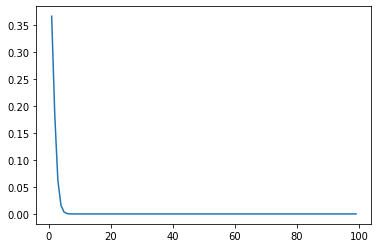

In [112]:
x = np.arange(1,100)
y = nbinom.pmf(x, n, p)
plt.plot(x, y)
plt.show()

In [113]:
small_parishes.pub.values

array([3, 0, 2, ..., 1, 0, 0])

In [114]:
small_parishes.population.values

array([2250, 2248, 2240, ...,  102,  101,  100])

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_94627/3516198067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  really_small.loc[:, 'pub_mask'] = really_small.pub > 0


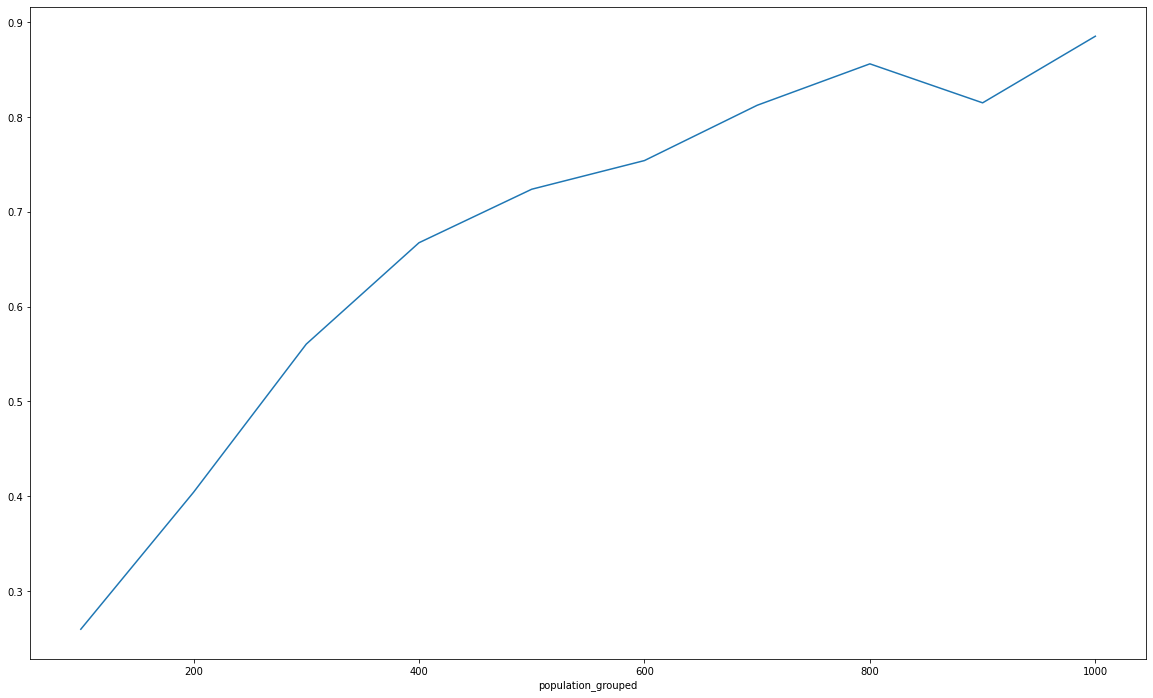

In [119]:
really_small = small_parishes[small_parishes.population <= 1000]
really_small.loc[:, 'pub_mask'] = really_small.pub > 0
fig, ax = plt.subplots(figsize=(20,12))
really_small.groupby(['population_grouped']).pub_mask.agg('mean').plot(ax=ax)
plt.show()

In [120]:
parished_only.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
3617   39                40      39    36                 6        2   
1820   32                23      19    16                 1        4   
1263   36                29      23     6                 5        5   
6333   29                22      22    24                 7        4   
682    37                24      18    47                 6        7   

      population                  name          county  population_grouped  
3617       96702      Sutton Coldfield   West Midlands             95000.0  
1820       57414         Kidderminster  Worcestershire             55000.0  
1263       57354              Keighley  West Yorkshire             55000.0  
6333       54331               Banbury     Oxfordshire             55000.0  
682        50923  Royal Leamington Spa    Warwickshire             50000.0

In [122]:
parished_only.groupby(['pub']).population.describe()

count          mean           std      min       25%      50%       75%  \
pub                                                                             
0    1764.0    580.358844    909.766826    100.0    187.00    293.0    524.00   
1    2317.0    997.188606   1520.268263    102.0    311.00    531.0   1015.00   
2    1040.0   1858.404808   2296.587215    126.0    595.00   1128.5   2147.50   
3     518.0   3169.403475   3159.812703    174.0   1078.50   2224.0   4137.00   
4     279.0   4315.756272   3521.411797    186.0   1532.50   3259.0   6053.00   
5     154.0   6732.272727   5963.125792    460.0   3102.75   5243.5   8279.75   
6     100.0   7464.200000   6138.368307    507.0   3126.50   6210.5   9677.00   
7      57.0   9276.508772   6256.167689   1774.0   4904.00   7756.0  11945.00   
8      39.0  10280.256410   7254.374146   1365.0   5300.50   8629.0  12486.00   
9      27.0  13527.814815   7207.298545   1327.0   8178.50  13554.0  16743.50   
10     23.0  13076.130435   6202.083508   3022.0   8731.50  11855.0  16537.00   
11     23.0  12815.086957   7312.974068   3435.0   7820.50  10959.0  15819.50   
12     26.0  18003.192308   9475.064411   5260.0  10658.25  17343.0  23733.75   
13     17.0  15959.529412   7597.129599   6320.0  11138.00  14372.0  21513.00   
14     12.0  16057.500000   6190.854318   4311.0  12963.25  17209.0  18106.75   
15      9.0  15332.222222   6826.743876   4484.0  12246.00  14943.0  19626.00   
16      6.0  16348.666667   4525.706162  11037.0  12827.00  16236.5  19316.75   
17     12.0  20807.916667   7752.102313  11845.0  15078.50  18500.5  23744.75   
18      9.0  17811.888889  11585.550618   4465.0   9267.00  16719.0  21945.00   
19      7.0  29455.142857   7286.412753  20653.0  24217.00  30472.0  32689.00   
20      6.0  27123.666667  12326.971577  16986.0  20608.75  22550.5  28048.00   
21      9.0  23826.111111  12031.425814   1928.0  15793.00  23178.0  30579.00   
22      2.0  11690.000000   5690.795375   7666.0   9678.00  11690.0  13702.00   
23      3.0  21955.000000  15372.409083   4275.0  16850.50  29426.0  30795.00   
24      1.0  14367.000000           NaN  14367.0  14367.00  14367.0  14367.00   
25      1.0  20606.000000           NaN  20606.0  20606.00  20606.0  20606.00   
26      1.0  25747.000000           NaN  25747.0  25747.00  25747.0  25747.00   
27      3.0  29114.333333   3756.741718  25126.0  27378.50  29631.0  31108.50   
28      2.0  25636.000000   6853.278923  20790.0  23213.00  25636.0  28059.00   
29      4.0  43497.250000  10514.495752  29588.0  39045.50  45035.0  49486.75   
30      4.0  29591.000000  11947.415341  21535.0  23408.50  24741.0  30923.50   
32      3.0  38585.000000  16424.301842  27206.0  29170.50  31135.0  44274.50   
33      2.0  36438.500000   2628.315906  34580.0  35509.25  36438.5  37367.75   
34      1.0  13135.000000           NaN  13135.0  13135.00  13135.0  13135.00   
36      1.0  57354.000000           NaN  57354.0  57354.00  57354.0  57354.00   
37      2.0  43333.500000  10733.173832  35744.0  39538.75  43333.5  47128.25   
39      1.0  96702.000000           NaN  96702.0  96702.00  96702.0  96702.00   
42      1.0  41901.000000           NaN  41901.0  41901.00  41901.0  41901.00   

         max  
pub           
0     8358.0  
1    27480.0  
2    22472.0  
3    21808.0  
4    18092.0  
5    41415.0  
6    38323.0  
7    32187.0  
8    32251.0  
9    27783.0  
10   25431.0  
11   33338.0  
12   44568.0  
13   32489.0  
14   27796.0  
15   27141.0  
16   22548.0  
17   37020.0  
18   42874.0  
19   41249.0  
20   50813.0  
21   41279.0  
22   15714.0  
23   32164.0  
24   14367.0  
25   20606.0  
26   25747.0  
27   32586.0  
28   30482.0  
29   54331.0  
30   47347.0  
32   57414.0  
33   38297.0  
34   13135.0  
36   57354.0  
37   50923.0  
39   96702.0  
42   41901.0

In [163]:
from scipy.stats import gaussian_kde

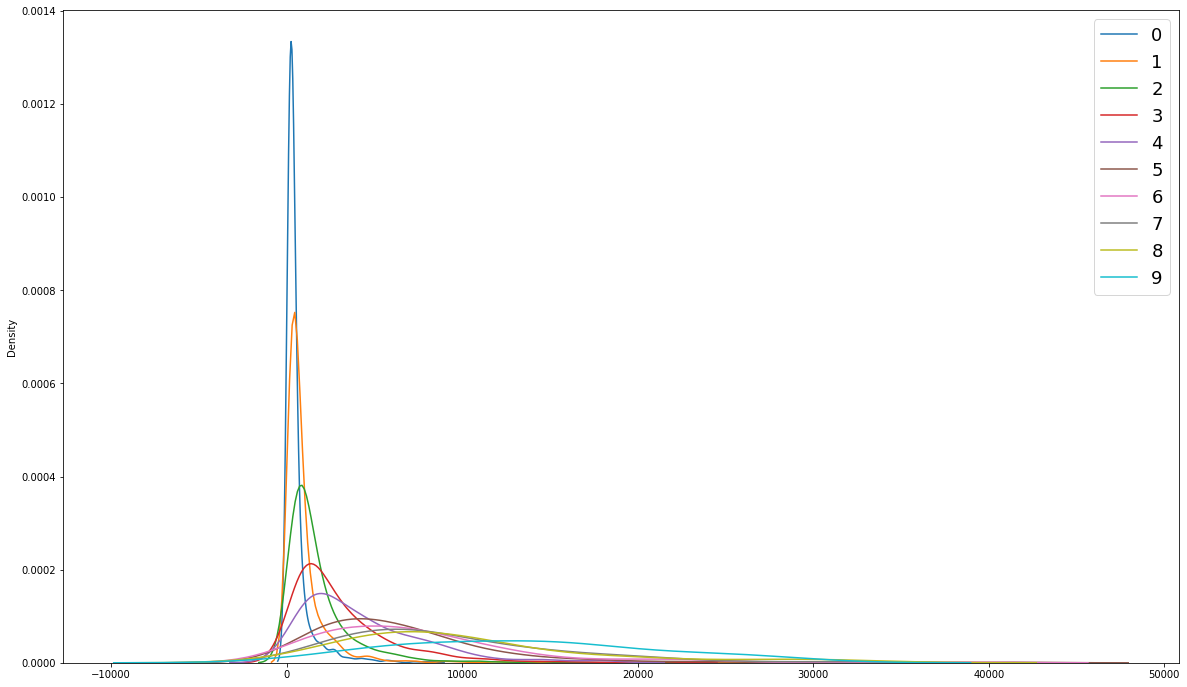

In [221]:
densities = []
fig, ax = plt.subplots(figsize=(20,12))
for i in range(10):
    pops = parished_only[parished_only.pub == i].population.values
    d = gaussian_kde(pops)
    xs = np.arange(1,25000)
    
    densities.append(d(xs))
    sns.kdeplot(np.array(pops), label=i)
    
plt.legend(fontsize=18)
plt.show()

In [222]:
densities

[array([0.00073188, 0.00073543, 0.00073898, ..., 0.        , 0.        ,
        0.        ]),
 array([4.15558141e-04, 4.16780807e-04, 4.18003824e-04, ...,
        7.56805836e-20, 7.75052662e-20, 7.93731807e-20]),
 array([2.03993356e-04, 2.04325885e-04, 2.04658478e-04, ...,
        6.18134559e-11, 6.13337122e-11, 6.08575069e-11]),
 array([1.10969052e-04, 1.11083690e-04, 1.11198345e-04, ...,
        2.01609430e-09, 2.00810761e-09, 2.00015020e-09]),
 array([7.00945195e-05, 7.01550749e-05, 7.02156431e-05, ...,
        1.80560856e-14, 1.79597782e-14, 1.78639710e-14]),
 array([4.03765695e-05, 4.03952785e-05, 4.04139901e-05, ...,
        1.96007826e-06, 1.95948608e-06, 1.95889381e-06]),
 array([3.82801623e-05, 3.82941786e-05, 3.83081955e-05, ...,
        4.38034949e-06, 4.37906694e-06, 4.37778446e-06]),
 array([2.28015820e-05, 2.28112265e-05, 2.28208729e-05, ...,
        4.57210912e-06, 4.57098193e-06, 4.56985510e-06]),
 array([2.12806655e-05, 2.12880591e-05, 2.12954541e-05, ...,
        7.1

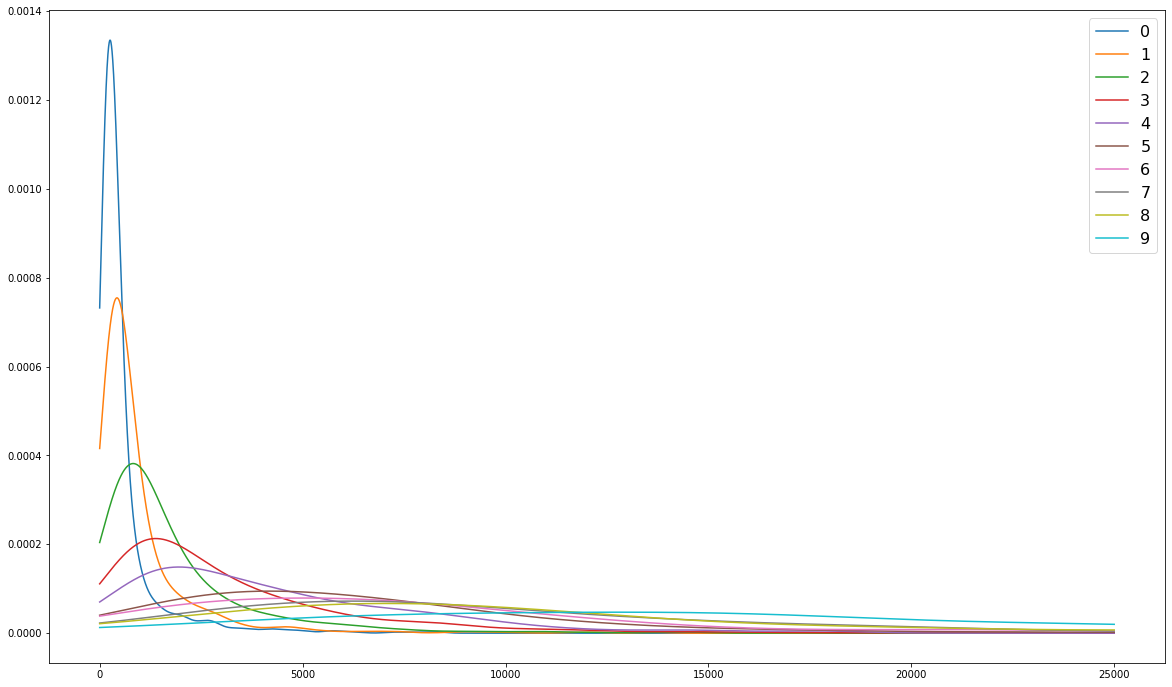

In [223]:
fig, ax = plt.subplots(figsize=(20,12))
for i, j in enumerate(densities):
    plt.plot(np.arange(len(j)), j, label=i)

plt.legend(fontsize=16)
plt.show()

In [224]:
big_array = np.array(densities)
print(big_array.shape)

(10, 24999)


In [206]:
big_array

array([[7.31880253e-04, 7.35428189e-04, 7.38978163e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.15558141e-04, 4.16780807e-04, 4.18003824e-04, ...,
        3.46217769e-84, 3.26573986e-84, 3.08041799e-84],
       [2.03993356e-04, 2.04325885e-04, 2.04658478e-04, ...,
        2.60577327e-07, 2.61204443e-07, 2.61832274e-07],
       [1.10969052e-04, 1.11083690e-04, 1.11198345e-04, ...,
        1.19316134e-06, 1.19411853e-06, 1.19507612e-06],
       [7.00945195e-05, 7.01550749e-05, 7.02156431e-05, ...,
        6.77775384e-07, 6.76648079e-07, 6.75522169e-07]])

In [225]:
normed = big_array / big_array.sum(axis=0)

In [226]:
normed[:,500]

array([0.36385263, 0.31041104, 0.14603827, 0.06955206, 0.04210912,
       0.02087751, 0.01892422, 0.01162989, 0.01049864, 0.00610662])

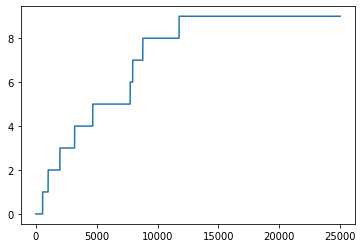

In [227]:
biggest_prob = np.argmax(normed, axis=0)
plt.plot(np.arange(len(biggest_prob)), biggest_prob)
plt.show()

In [228]:
lol = []
for row in normed.T:
    lol.append(np.sum([i*j for i,j in enumerate(row)]))


In [229]:
lol

[1.3864107584228023,
 1.3836733881798655,
 1.380951733159754,
 1.3782457649606072,
 1.3755554549724882,
 1.3728807743825782,
 1.3702216941803487,
 1.3675781851626727,
 1.3649502179388915,
 1.3623377629358464,
 1.359740790402841,
 1.3571592704165831,
 1.3545931728860525,
 1.3520424675573524,
 1.3495071240184808,
 1.3469871117040786,
 1.3444823999001234,
 1.3419929577485723,
 1.3395187542519618,
 1.337059758277954,
 1.334615938563849,
 1.3321872637210321,
 1.3297737022393865,
 1.3273752224916546,
 1.3249917927377475,
 1.3226233811290204,
 1.3202699557124815,
 1.3179314844349679,
 1.315607935147275,
 1.313299275608226,
 1.3110054734887098,
 1.3087264963756584,
 1.3064623117759881,
 1.304212887120488,
 1.3019781897676619,
 1.2997581870075265,
 1.2975528460653634,
 1.2953621341054224,
 1.2931860182345771,
 1.2910244655059386,
 1.2888774429224243,
 1.2867449174402723,
 1.2846268559725267,
 1.2825232253924546,
 1.2804339925369377,
 1.278359124209815,
 1.2762985871851693,
 1.2742523482105832,


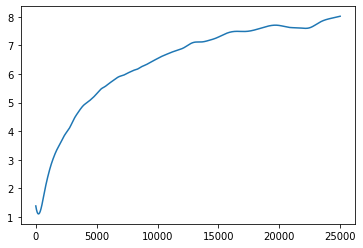

In [230]:
thingy = np.mean(normed, axis=0)
plt.plot(np.arange(len(biggest_prob)), lol)
plt.show()

In [128]:
parished_only.loc[:, 'pubs_per_person'] = parished_only.pub / parished_only.population
parished_only.pubs_per_person.describe()

count    6486.000000
mean        0.001618
std         0.002007
min         0.000000
25%         0.000000
50%         0.000988
75%         0.002363
max         0.021505
Name: pubs_per_person, dtype: float64

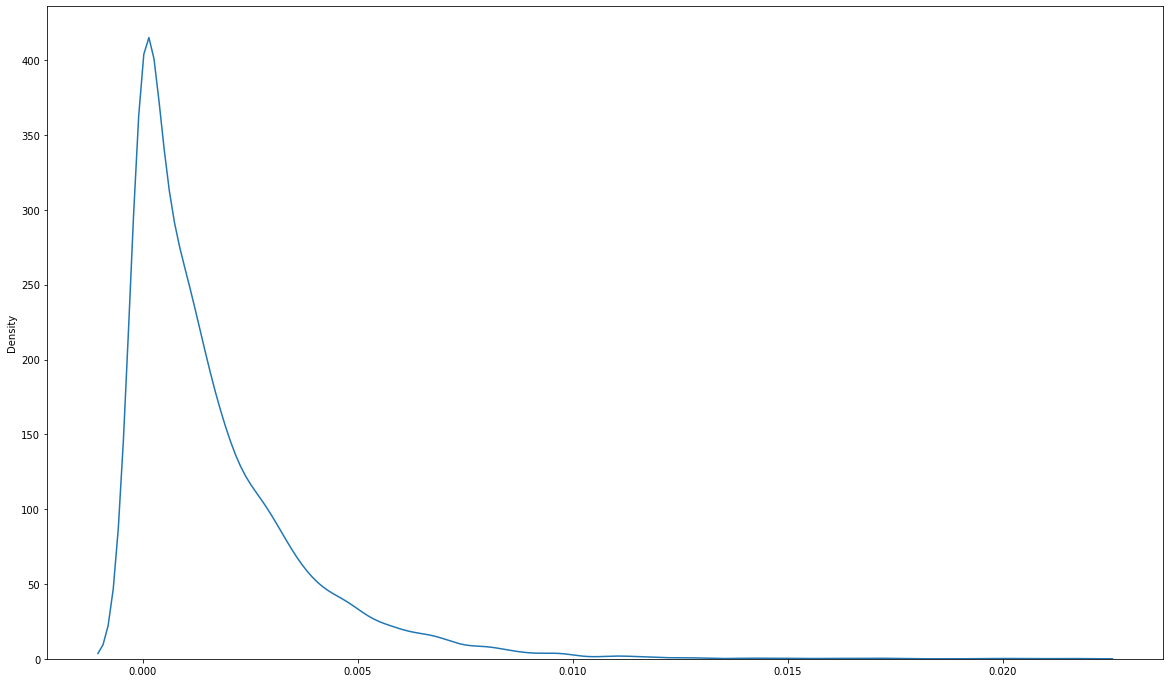

In [129]:
fig, ax = plt.subplots(figsize=(20,12))
sns.kdeplot(np.array(parished_only.pubs_per_person))
plt.show()

In [136]:
only_pubs = parished_only[parished_only.pub > 0]
only_pubs.loc[:, 'people_per_pub'] = only_pubs.population / only_pubs.pub
only_pubs.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_94627/1821511768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_pubs.loc[:, 'people_per_pub'] = only_pubs.population / only_pubs.pub


pub  place_of_worship  school  cafe  community_centre  doctors  \
3617   39                40      39    36                 6        2   
1820   32                23      19    16                 1        4   
1263   36                29      23     6                 5        5   
6333   29                22      22    24                 7        4   
682    37                24      18    47                 6        7   

      population                  name          county  population_grouped  \
3617       96702      Sutton Coldfield   West Midlands             95000.0   
1820       57414         Kidderminster  Worcestershire             55000.0   
1263       57354              Keighley  West Yorkshire             55000.0   
6333       54331               Banbury     Oxfordshire             55000.0   
682        50923  Royal Leamington Spa    Warwickshire             50000.0   

      pubs_per_person  people_per_pub  
3617         0.000403     2479.538462  
1820         0.000557     1794.187500  
1263         0.000628     1593.166667  
6333         0.000534     1873.482759  
682          0.000727     1376.297297

In [137]:
only_pubs.sort_values(by='people_per_pub').head(10)

pub  place_of_worship  school  cafe  community_centre  doctors  \
4608    4                 2       0     3                 1        0   
4324    4                 1       0     0                 1        0   
5473    4                 2       0     2                 0        0   
43      3                 1       0     1                 1        0   
4601    4                 2       1     1                 0        0   
5785    3                 1       1     0                 0        0   
4384    2                 2       0     0                 0        0   
1631    2                 1       0     0                 0        0   
4286    3                 1       0     0                 0        0   
6014    2                 0       0     0                 0        0   

      population                      name           county  \
4608         186  Barton and Pooley Bridge          Cumbria   
4324         196                 Wormshill             Kent   
5473         203   Brendon and Countisbury            Devon   
43           174                   Buckden  North Yorkshire   
4601         235                   Eskdale          Cumbria   
5785         184             Fenny Bentley       Derbyshire   
4384         126                  Snargate             Kent   
1631         133                    Exmoor         Somerset   
4286         204                Luddesdown             Kent   
6014         141              Nuthampstead    Hertfordshire   

      population_grouped  pubs_per_person  people_per_pub  
4608               200.0         0.021505       46.500000  
4324               200.0         0.020408       49.000000  
5473               200.0         0.019704       50.750000  
43                 200.0         0.017241       58.000000  
4601               200.0         0.017021       58.750000  
5785               200.0         0.016304       61.333333  
4384               100.0         0.015873       63.000000  
1631               100.0         0.015038       66.500000  
4286               200.0         0.014706       68.000000  
6014               100.0         0.014184       70.500000

In [138]:
only_pubs.sort_values(by='people_per_pub', ascending=False).head(10)

pub  place_of_worship  school  cafe  community_centre  doctors  \
1843    1                 5      11     3                 1        2   
3684    1                 3       5     0                 2        0   
3627    1                 3       3     3                 1        1   
6400    1                 2       4     0                 2        1   
5120    1                 3       3     1                 0        1   
5034    1                 1       4     2                 3        1   
4185    1                 2       3     1                 0        1   
2048    1                 4       3     0                 1        0   
4476    1                11       5     1                 0        0   
1220    1                 3       8     1                 0        0   

      population                        name           county  \
1843       27480                    Wickford            Essex   
3684       13911                  Rossington  South Yorkshire   
3627       13734              Chelmsley Wood    West Midlands   
6400       13468              Blackbird Leys      Oxfordshire   
5120       13412  Heath Hayes and Wimblebury    Staffordshire   
5034       12345                   Cambourne   Cambridgeshire   
4185       12164                  Kingsnorth             Kent   
2048       12067                    Hawkwell            Essex   
4476       11969                Southborough             Kent   
1220       11770                    Knowsley       Merseyside   

      population_grouped  pubs_per_person  people_per_pub  
1843             25000.0         0.000036         27480.0  
3684             15000.0         0.000072         13911.0  
3627             15000.0         0.000073         13734.0  
6400             15000.0         0.000074         13468.0  
5120             15000.0         0.000075         13412.0  
5034             10000.0         0.000081         12345.0  
4185             10000.0         0.000082         12164.0  
2048             10000.0         0.000083         12067.0  
4476             10000.0         0.000084         11969.0  
1220             10000.0         0.000085         11770.0

In [139]:
only_schools = parished_only[parished_only.school > 0]
only_schools.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
3617   39                40      39    36                 6        2   
1820   32                23      19    16                 1        4   
1263   36                29      23     6                 5        5   
6333   29                22      22    24                 7        4   
682    37                24      18    47                 6        7   

      population                  name          county  population_grouped  \
3617       96702      Sutton Coldfield   West Midlands             95000.0   
1820       57414         Kidderminster  Worcestershire             55000.0   
1263       57354              Keighley  West Yorkshire             55000.0   
6333       54331               Banbury     Oxfordshire             55000.0   
682        50923  Royal Leamington Spa    Warwickshire             50000.0   

      pubs_per_person  
3617         0.000403  
1820         0.000557  
1263         0.000628  
6333         0.000534  
682          0.000727

In [140]:
only_schools.loc[:, 'people_per_school'] = only_schools.population / only_schools.school
only_schools.sort_values(by='people_per_school').head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_94627/442122470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_schools.loc[:, 'people_per_school'] = only_schools.population / only_schools.school


pub  place_of_worship  school  cafe  community_centre  doctors  \
6432    0                 2       3     0                 0        0   
1012    0                 1       2     0                 1        0   
6116    0                 1       2     0                 0        0   
21      1                 1       2     1                 0        0   
4508    1                 0       2     1                 0        0   

      population                  name           county  population_grouped  \
6432         191              Elsfield      Oxfordshire               200.0   
1012         156             Bleasdale       Lancashire               200.0   
6116         159              Hatherop  Gloucestershire               200.0   
21           190  Stirton with Thorlby  North Yorkshire               200.0   
4508         216             Winscales          Cumbria               200.0   

      pubs_per_person  people_per_school  
6432         0.000000          63.666667  
1012         0.000000          78.000000  
6116         0.000000          79.500000  
21           0.005263          95.000000  
4508         0.004630         108.000000

In [142]:
only_schools.sort_values(by='people_per_school', ascending=False).head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
4339    2                 4       1     1                 1        0   
2983    4                 2       1     1                 0        2   
1048    3                 5       1     1                 1        1   
966     4                 2       1     1                 1        1   
5127    0                 3       1     0                 0        0   

      population         name          county  population_grouped  \
4339        9883   Edenbridge            Kent             10000.0   
2983        9341     Polegate     East Sussex             10000.0   
1048        8319  Mountsorrel  Leicestershire             10000.0   
966         7861    Farington      Lancashire             10000.0   
5127        7843     Anglesey   Staffordshire             10000.0   

      pubs_per_person  people_per_school  
4339         0.000202             9883.0  
2983         0.000428             9341.0  
1048         0.000361             8319.0  
966          0.000509             7861.0  
5127         0.000000             7843.0

In [146]:
parished_only.groupby(['county']).population.describe().sort_values(by='50%')

count         mean           std     min      25%     50%  \
county                                                                       
North Yorkshire  525.0   961.550476   2009.742000   102.0   208.00   331.0   
Suffolk          422.0  1471.587678   4069.023751   100.0   236.00   435.0   
Lincolnshire     422.0  1320.786730   2782.260495   103.0   225.00   441.0   
Cumbria          255.0  1466.113725   3375.966631   104.0   298.00   478.0   
Nottinghamshire  197.0  1868.030457   3462.641296   111.0   267.00   522.0   
Norfolk          488.0  1387.538934   2651.935735   108.0   309.75   536.0   
Gloucestershire  245.0  1849.465306   3125.251943   104.0   288.00   542.0   
Warwickshire     186.0  2087.650538   5341.884989   109.0   265.50   571.0   
Devon            392.0  1736.974490   3677.642773   105.0   319.00   577.5   
Oxfordshire      285.0  2076.115789   5385.640302   110.0   308.00   588.0   
Somerset         309.0  1691.423948   3961.860762   101.0   312.00   596.0   
Worcestershire   178.0  2180.747191   5878.676602   107.0   297.25   626.5   
Leicestershire   195.0  2457.625641   3485.475403   114.0   338.50   813.0   
Cambridgeshire   223.0  2390.887892   4397.733101   103.0   376.00   879.0   
Derbyshire       226.0  2479.017699   3721.044715   105.0   340.25   904.0   
Hampshire        255.0  3311.894118   5766.792813   116.0   488.50   997.0   
Staffordshire    189.0  3343.312169   5139.648447   123.0   391.00  1071.0   
Essex            294.0  3079.156463   5589.906251   116.0   467.00  1083.0   
Hertfordshire    125.0  4511.736000   8270.505080   119.0   479.00  1194.0   
Lancashire       199.0  3053.839196   5211.560538   120.0   482.50  1231.0   
East Sussex       98.0  3603.836735   6412.093831   165.0   463.75  1496.0   
Kent             308.0  3217.269481   5313.936107   116.0   667.00  1531.0   
South Yorkshire   93.0  4090.537634   5536.309108   127.0   316.00  1695.0   
West Sussex      147.0  3997.884354   6437.508007   113.0   549.00  1806.0   
Surrey            86.0  4338.941860   6571.025176   176.0   849.50  2375.5   
West Yorkshire    92.0  7140.880435   8932.454815   148.0  1618.25  3771.0   
Tyne and Wear      9.0  5154.888889   4597.751038  1038.0  1357.00  4088.0   
West Midlands     21.0  9555.523810  20332.370736   590.0  2037.00  4797.0   
Merseyside        22.0  7768.000000   6739.508503   462.0  2299.00  6011.5   

                      75%      max  
county                              
North Yorkshire    758.00  17194.0  
Suffolk            994.75  47872.0  
Lincolnshire      1063.75  21127.0  
Cumbria           1109.50  29588.0  
Nottinghamshire   1763.00  30439.0  
Norfolk           1171.75  25250.0  
Gloucestershire   1857.00  22144.0  
Warwickshire      1764.50  50923.0  
Devon             1367.50  35502.0  
Oxfordshire       1546.00  54331.0  
Somerset          1332.00  38297.0  
Worcestershire    1543.25  57414.0  
Leicestershire    2997.50  17259.0  
Cambridgeshire    2490.00  33411.0  
Derbyshire        3159.50  21535.0  
Hampshire         3466.50  50813.0  
Staffordshire     4544.00  32586.0  
Essex             2797.75  38323.0  
Hertfordshire     4325.00  42874.0  
Lancashire        2924.00  34580.0  
East Sussex       3179.50  44568.0  
Kent              3485.75  47347.0  
South Yorkshire   5161.00  31135.0  
West Sussex       3799.00  32489.0  
Surrey            4264.50  42198.0  
West Yorkshire    9032.50  57354.0  
Tyne and Wear     7267.00  14979.0  
West Midlands     8350.00  96702.0  
Merseyside       11582.75  22127.0

### Generating a procedure for Gaussian KDE

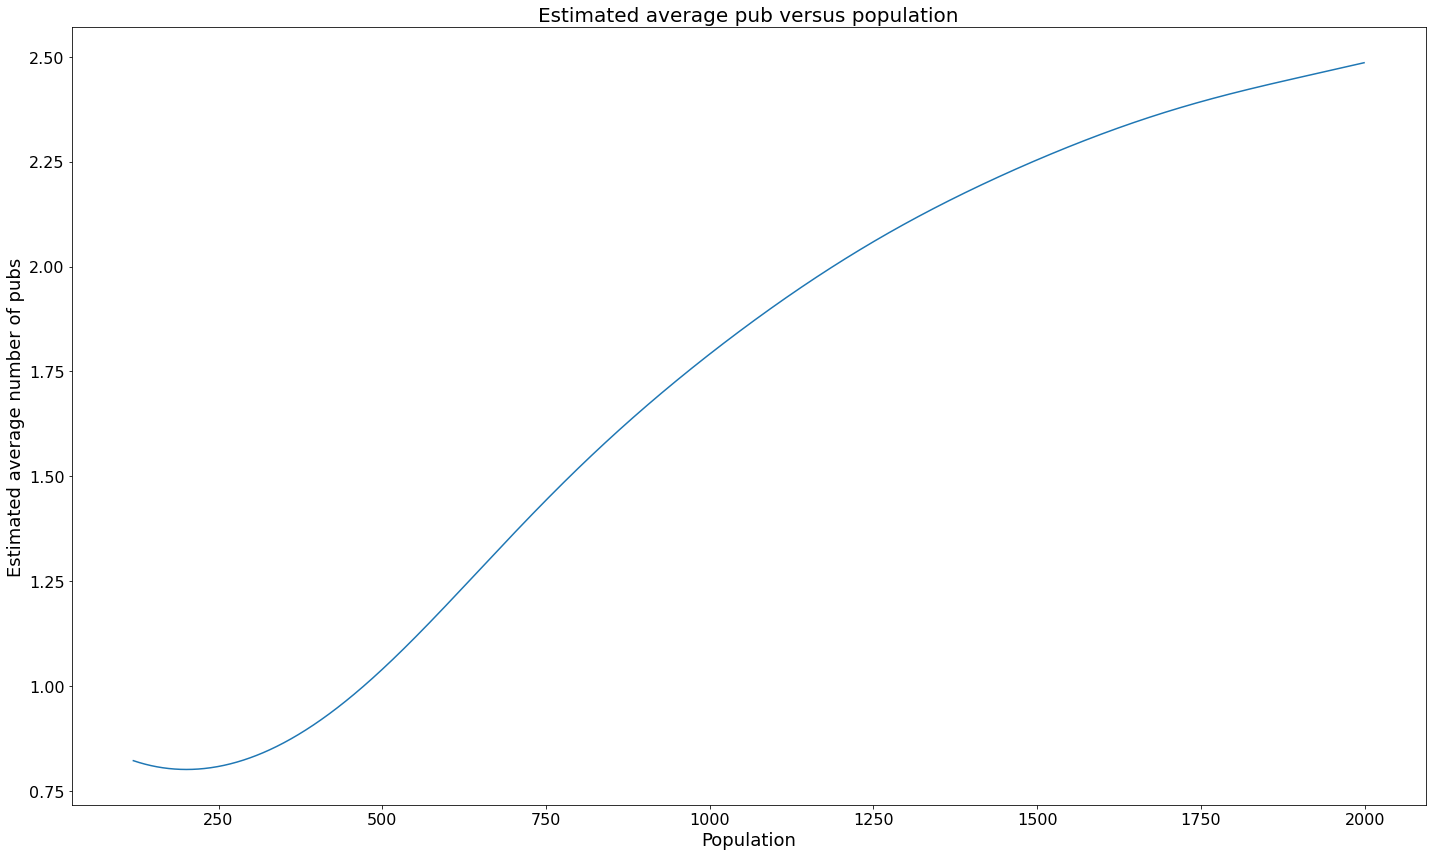

In [255]:
N = 5
facility_type = 'pub'
frame = parished_only
pop_range = np.arange(120,2000)
method = 'silverman'
d_frame = []
other_d_frame = []

for i in range(N):
    pops = frame[frame[facility_type] == i].population.values
    d = gaussian_kde(pops, bw_method=method)
    d_frame.append(d(pop_range))
    
big_array = np.array(d_frame)
normed_array = big_array / big_array.sum(axis=0)
estimated_averages = []
for row in normed_array.T:
    estimated_averages.append(np.sum([i*j for i, j in enumerate(row)]))
    
fig, ax = plt.subplots(figsize=(20,12))
plt.plot(pop_range, estimated_averages)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Estimated average number of {0}s'.format(facility_type), fontsize=18)
plt.yticks(fontsize=16)
plt.title("Estimated average {0} versus population".format(facility_type), fontsize=20)
plt.tight_layout()
plt.show()

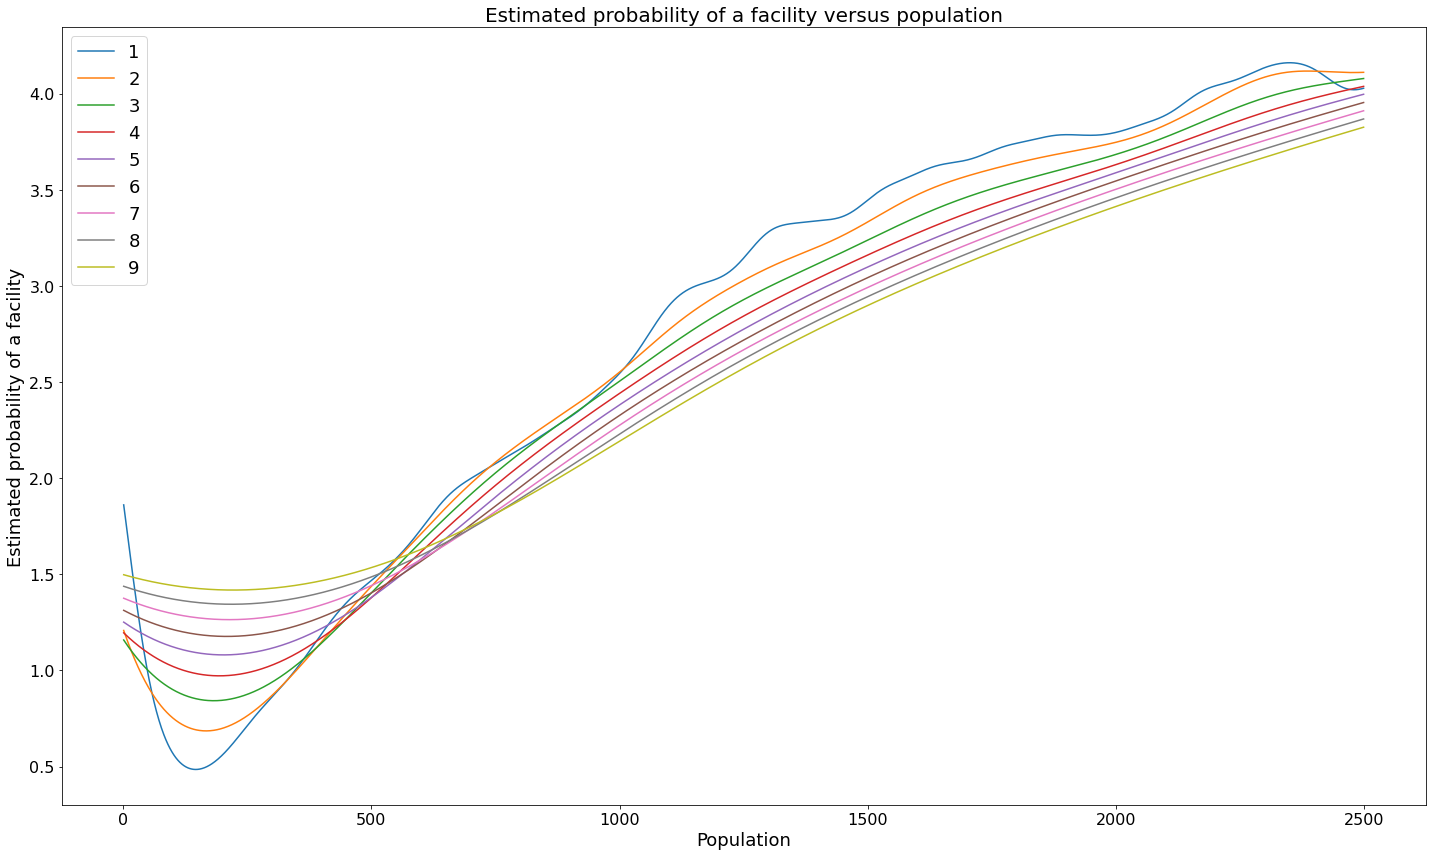

In [288]:
N = 10
facility_type = 'school'
frame = parished_only
pop_range = np.arange(1,2500)
method = 'silverman'
d_frame = []
aha = []

def get_average(frame, facility_type, pop_range, N, method='silverman', bool_problem = False):
    d_frame = []
    if bool_problem:
        pop_no = frame[frame[facility_type] == 0].population.values
        d_no = gaussian_kde(pop_no, bw_method=method)
        d_frame.append(d_no(pop_range))
        pop_yes = frame[frame[facility_type] > 0].population.values
        d_yes = gaussian_kde(pop_yes, bw_method=method)
        d_frame.append(d_yes(pop_range))
    else:
        for i in range(N):
            pops = frame[frame[facility_type] == i].population.values
            d = gaussian_kde(pops, bw_method=method)
            d_frame.append(d(pop_range))

    big_array = np.array(d_frame)
    normed_array = big_array / big_array.sum(axis=0)
    estimated_averages = []
    for row in normed_array.T:
        estimated_averages.append(np.sum([i*j for i, j in enumerate(row)]))
        aha.append([row])
    return estimated_averages

fig, ax = plt.subplots(figsize=(20,12))
for fac in range(1,10):
    avgs = get_average(
        parished_only,
        'pub',
        pop_range,
        10,
        fac/20,
        bool_problem=False
    )
    plt.plot(pop_range, avgs, label=fac)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Estimated probability of a facility', fontsize=18)
plt.yticks(fontsize=16)
plt.title("Estimated probability of a facility versus population", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

In [290]:
parished_only[parished_only.population <= 150].agg('mean')

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_94627/2890967075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  parished_only[parished_only.population <= 150].agg('mean')


pub                     0.278997
place_of_worship        1.012539
school                  0.068966
cafe                    0.188088
community_centre        0.141066
doctors                 0.000000
population            130.050157
population_grouped    103.448276
pubs_per_person         0.002146
dtype: float64

In [291]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [293]:
lr.fit(parished_only.population.values.reshape(-1,1), parished_only.pub.values)

LinearRegression()

In [294]:
lr.coef_

array([0.00053464])